# Homework 2 - Hückel Theory and Argus Lab
Gabriel Fior - 03642356

In this homework, we had to do the following:
1. Calculate energy levels of HOMO/LUMO levels
2. Determine HOMO/LUMO wavefunctions and their electron density (and plot them)
3. Compare results with ArgusLab


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [99]:
alpha=-6.6 #eV
beta=-2.7 #eV
N= 10 #available e- in naphthalene

Here we determine the Hamiltonian of the system, defined by:
\begin{align}
H_{ij} = \alpha \hspace{2cm} \text{if } i=j\\
H_{ij} = \beta \hspace{2cm} \text{if i and j are next neighbors}\\
H_{ij} = 0 \hspace{2cm} \text{otherwise} \\
\end{align}


In [47]:
# determine hamiltonian => alpha if i=j, beta if first neighbours, 0 otherwise
H = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i==j:
            H[i,j] = alpha
        elif j==(i-1) or j==(i+1):
            H[i,j] = beta

#additional neighbors, according to image from homework 1
#C5 neighbor of C10 and vice-versa
H[4,-1]  = beta
H[-1,0] = beta
H[-1,4] = beta
H[0,-1] = beta
print H

[[-6.6 -2.7  0.   0.   0.   0.   0.   0.   0.  -2.7]
 [-2.7 -6.6 -2.7  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -2.7 -6.6 -2.7  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -2.7 -6.6 -2.7  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -2.7 -6.6 -2.7  0.   0.   0.  -2.7]
 [ 0.   0.   0.   0.  -2.7 -6.6 -2.7  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -2.7 -6.6 -2.7  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -2.7 -6.6 -2.7  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -2.7 -6.6 -2.7]
 [-2.7  0.   0.   0.  -2.7  0.   0.   0.  -2.7 -6.6]]


Below we calculate the eigenvalues and eigenvectors of the hamiltonian in order to get the energies and the corresponding wave functions (molecular orbitals) as coefficients ck (coeff_k)

In [104]:
Ek, coeff_k = np.linalg.eig(H)  # c_ik eigenvectors, E_k their eigenvalues

indices_sorted = np.argsort(Ek) #sort in ascending energies
Ek.sort()

sorted_coeff_k = coeff_k[indices_sorted]
print 'energies sorted: ' + str(Ek)

energies sorted: [-12.81749422 -10.96869177 -10.11749422  -9.3         -8.26869177
  -4.93130823  -3.9         -3.08250578  -2.23130823  -0.38250578]


Since we have 10 available electrons, we can fill up until the 5th orbital. We have the 1s2, 2s2 and 2p6 totally filled. Therefore, our top most filled level (HOMO) is the 5th level (Ek[4]) and our lowest unnocupied level (LUMO) is the 6th level (Ek[5])

In [108]:
E_gap = Ek[np.int(N/2)] - Ek[np.int(N/2 - 1)]
print 'Egap : ' +str(E_gap)+' eV'

Egap : 3.33738353925 eV


# Calculate wave functions

From the website http://winter.group.shef.ac.uk/orbitron/AOs/1s/equations.html, we have that the wave functions for the 2pz orbital can be constructed as follows
\begin{equation}
\phi_s = R_{1_s} Y_{1_s} = \frac{1}{2\sqrt{6}}\rho Z^{3/2} \exp(-\rho/2))(\frac{\sqrt{3}*z/r}{\sqrt{4 \pi}})
\end{equation}
and the electron density is given by
\begin{equation}
n =\phi_{1_s}^2
\end{equation}

In [109]:
#Calculate wave function
def wavefunction(x,y,z):
    
    Z_eff = 3.136 #orbital specific, got a mean number for Carbon from wikipedia
    n = 2 #2p orbitals               
    r = np.sqrt(x**2 + y**2 + z**2) #radial coordinate
    rho = 2*Z_eff*r/n / 52.9 #conversion between Bohr radius and atomic units
    R = 1./(2.*np.sqrt(6))*rho*Z_eff**(1.5)*np.exp(-rho/2)
    Y = np.sqrt(3)*z/r /np.sqrt(4.*np.pi)    
    Psi_pz = R * Y
    
    return Psi_pz

Below we initialize the xy grid where the wavefunctions are going to be defined, and also the molecule is localized.

In [110]:
width = 1000
length = 500
step = 0.5

gridX = np.arange(0,width,step)
gridY = np.arange(0,length,step)
x,y = np.meshgrid(gridX,gridY,sparse = True)

N = 10 #number of atoms

r = np.zeros((N,2)) #holds [x,y] position of each atom

d = 140
h = 0.5*d  
w = np.sqrt(3)*0.5*d 

#positions of atoms in molecule
r[0] = [w, 2*h+d]
r[1] = [0,h+d]
r[2] = [0,h]
r[3] = [w,0]
r[4] = [2*w,h]
r[5] = [3*w,0]
r[6] = [4*w,h]
r[7] = [4*w,h+d]
r[8] = [3*w,2*h+d]
r[9] = [2*w,h+d]

#we recenter the molecule so that the image is better localized in the grid and the plotting is easier
r[:,0] += 100
r[:,1] += 100

In [166]:
rho = np.zeros((length/step,width/step))
#list_energies = []
list_z=[]
list_rhos=[]

for z in (-70,-30,1,10,50,80,100):
    list_energies=[]
    rho = np.zeros((length/step,width/step))
    for E in range(6):

        Psi_k = np.zeros((length/step,width/step))

        for n in range(N):

            xnew = x - r[n,0]
            ynew = y - r[n,1]                
            Psi_k += coeff_k[n,indices_sorted[E]] * wavefunction(xnew, ynew, z)

        #if E <= 5:
        rho += 2 * (Psi_k)**2

        list_energies.append([z,E,Psi_k])
    list_z.append([z,list_energies])
    list_rhos.append(rho)


/Users/gabrielfior/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/gabrielfior/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/gabrielfior/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


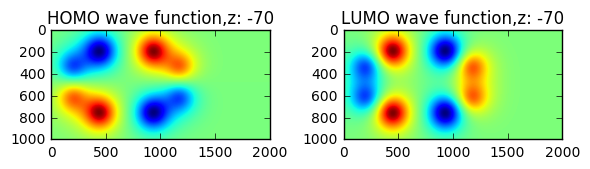

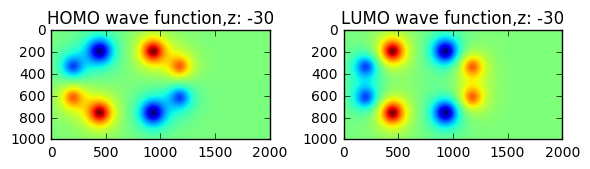

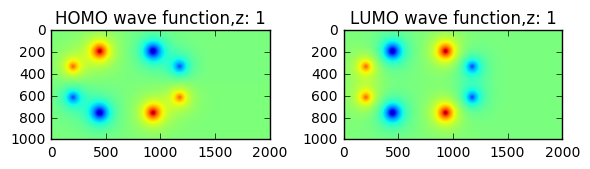

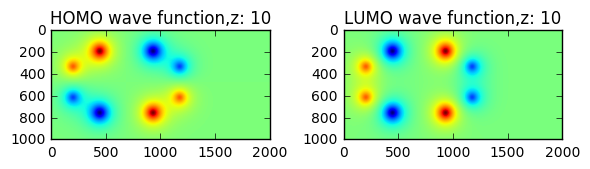

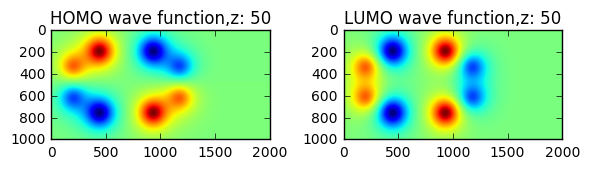

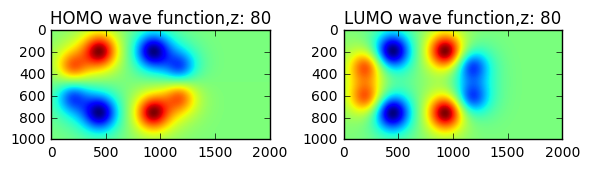

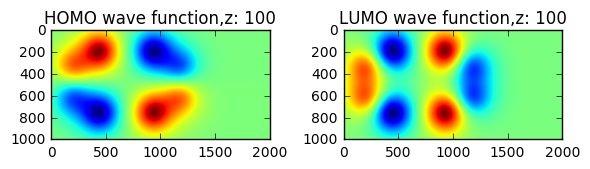

In [167]:
#list_energies
for i in range(len(list_z)):
    plt.figure(i)

    plt.subplot(121)
    plt.imshow(list_z[i][1][-2][2])
    plt.title('HOMO wave function,z: '+str(list_z[i][1][-2][0]))
    plt.subplot(122)
    plt.imshow(list_z[i][1][-1][2])
    plt.title('LUMO wave function,z: '+str(list_z[i][1][-2][0]))
    plt.tight_layout()
    plt.show()
#print len(list_z[0][1][-1])


In the images above, one can notice that, for the low heights z (1,10) the atom positions can be directly noticed. As the height increases, the wave function get smeared out.

Below I plot the electron charge density $\rho$, which was obtained by summing up the absolute value of the wave function up to the HOMO level.

5


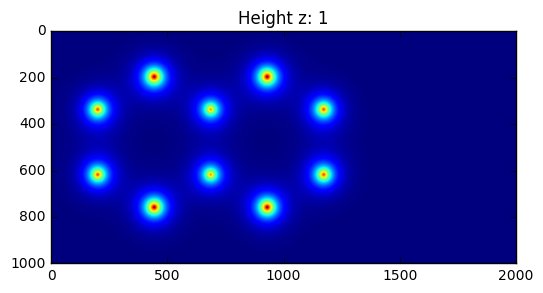

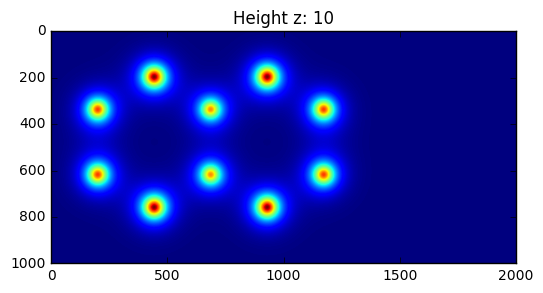

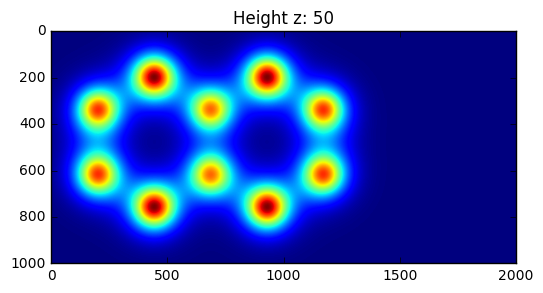

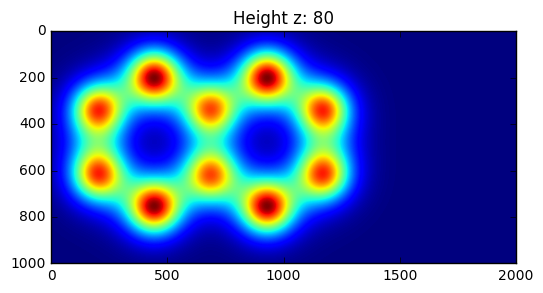

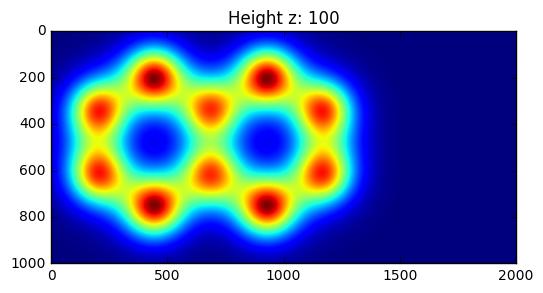

In [165]:
print len(list_rhos)
for i,j in zip(range(len(list_rhos)),(1,10,50,80,100)):
    plt.imshow(list_rhos[i])
    plt.title('Height z: '+str(j))
    plt.show()

The final step is to compare my results with ArgusLab. As can be seen in the images below, the plots of the HOMO/LUMO orbitals agree very well, specially if you see that in both calculations the sign of the wave function changes (going from blue to red, when z goes from a negative value to a positive value), and vice-versa.

<h2>LUMO orbital calculated for Naphtalene by Argus</h2>
<img src="lumo_argus.png">
<h2>HOMO orbital calculated for Naphtalene by Argus</h2>
<img src="homo_argus.png">
